# Customer churn predicting
#### Data from https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data
#### Notebook made by Veronika Kukk

In [1]:
# Importing modules
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from keras.layers import Dense, Input, BatchNormalization
from keras.models import Sequential
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Data overview

In [2]:
input_file = 'customer_data.csv'
original_data = pd.read_csv(input_file, delimiter=",")
pd.set_option('display.max_columns', None) # View all columns

In [3]:
original_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
original_data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### Unique values

In [6]:
for column in original_data.columns:
    unique_values = original_data[column].unique()
    print(column + ": " + str(unique_values) + "\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank tra

<br>
Most of the data is type object but it can be made into numerical data. For example all of the columns with Yes and No values can be converted to 1 and 0. Columns that have 3-4 values can be converted to one-hot vectors.
<br>There are no columns with missing values.
<br>Column customerID is irrelevant because it is unique for every customer and does not show influence the churn.
<br>Tenure goes from 0 to 72 and can be divided into bins because there are not many unique values.

In [7]:
yes_no_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

In [8]:
one_hot_columns = ["gender", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

In [9]:
# Checking if StreamingTV and StreamingMovies are same or not
(original_data['StreamingTV'] == original_data['StreamingMovies']).all()

False

### Visualizing Churn

In [10]:
pie_chart_colors = ["lightblue", "yellow"]

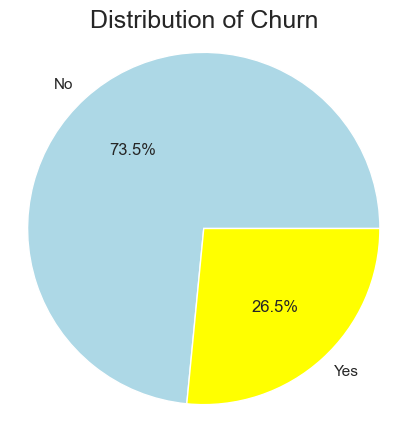

In [11]:
churn_values = original_data["Churn"].value_counts()
sns.set(font_scale=1)
plt.figure(figsize=(5, 5))
plt.pie(churn_values, labels=churn_values.index, autopct='%1.1f%%', colors=pie_chart_colors)
plt.title('Distribution of Churn',fontsize=18)
plt.axis('equal')
plt.show()

Data is skewed towards negative Churn which potentially means that we need to balance the data later on. Otherwise the models could be biased towards predicting "No".

## Data preprocessing

In [12]:
# deep copy
data = original_data.copy()
data = data.drop("customerID", axis=1)
data = data.drop_duplicates()

In [13]:
# Converting already numerical column to be numeric type
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

print("Missing value count: ",data["TotalCharges"].isnull().sum())

# Filling with MonthlyCharges * tenure because that is what a person would have to pay
data["TotalCharges"] = data["TotalCharges"].fillna(data["MonthlyCharges"] * data["tenure"])

print("Missing value count after filling: ", data["TotalCharges"].isnull().sum())

Missing value count:  11
Missing value count after filling:  0


In [14]:
# Make sure to remove rows with data that is not logical
print("Before removing rows with contradictions regarding PhoneService:", len(data))

# PhoneService No and MultipleLines is not No phone service
data = data.drop(data[(data["PhoneService"] == "No") & (data["MultipleLines"] != "No phone service")].index)

# PhoneService Yes and MultipleLines is No phone service
data = data.drop(data[(data["PhoneService"] == "Yes") & (data["MultipleLines"] == "No phone service")].index)

print("After removing rows with contradictions regarding PhoneService:", len(data))

Before removing rows with contradictions regarding PhoneService: 7021
After removing rows with contradictions regarding PhoneService: 7021


In [15]:
# Make sure to remove rows with data that is not logical
print("Before removing rows with contradictions regarding InternetService:", len(data))

# InternetService No and OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies is not No internet service
data = data.drop(data[(data["InternetService"] == "No") & (data["OnlineSecurity"] != "No internet service")].index)
data = data.drop(data[(data["InternetService"] == "No") & (data["OnlineBackup"] != "No internet service")].index)
data = data.drop(data[(data["InternetService"] == "No") & (data["DeviceProtection"] != "No internet service")].index)
data = data.drop(data[(data["InternetService"] == "No") & (data["TechSupport"] != "No internet service")].index)
data = data.drop(data[(data["InternetService"] == "No") & (data["StreamingTV"] != "No internet service")].index)
data = data.drop(data[(data["InternetService"] == "No") & (data["StreamingMovies"] != "No internet service")].index)

# InternetService not No and OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies is No internet service
data = data.drop(data[(data["InternetService"] != "No") & (data["OnlineSecurity"] == "No internet service")].index)
data = data.drop(data[(data["InternetService"] != "No") & (data["OnlineBackup"] == "No internet service")].index)
data = data.drop(data[(data["InternetService"] != "No") & (data["DeviceProtection"] == "No internet service")].index)
data = data.drop(data[(data["InternetService"] != "No") & (data["TechSupport"] == "No internet service")].index)
data = data.drop(data[(data["InternetService"] != "No") & (data["StreamingTV"] == "No internet service")].index)
data = data.drop(data[(data["InternetService"] != "No") & (data["StreamingMovies"] == "No internet service")].index)

print("After removing rows with contradictions regarding InternetService:", len(data))

Before removing rows with contradictions regarding InternetService: 7021
After removing rows with contradictions regarding InternetService: 7021


Seems like no rows were removed  which means that there were no rows with contradictions.

In [16]:
# Make sure that there are no missing values
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [17]:
# Converting Yes and No to 1 and 0
data[yes_no_columns] = data[yes_no_columns].replace({"Yes": 1, "No": 0})

In [18]:
# One-hot encoding
for column in one_hot_columns:
    onehot_values = pd.get_dummies(data[column], prefix=column, dtype=float)
    data = data.join(onehot_values)
    data = data.drop(column, axis=1)

In [19]:
# Scaling data that is not 1 or 0
scaling_columns = ["MonthlyCharges", "TotalCharges"]
scaler = MinMaxScaler()
data[scaling_columns] = scaler.fit_transform(data[scaling_columns])

In [20]:
# Tenure in bins
tenure_bins = pd.qcut(data["tenure"], q=10, labels=False)
tenure_onehot_values = pd.get_dummies(tenure_bins, prefix='tenure_bin', dtype=float)
data = data.join(tenure_onehot_values)
data = data.drop("tenure", axis=1)

In [21]:
data.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_0,tenure_bin_1,tenure_bin_2,tenure_bin_3,tenure_bin_4,tenure_bin_5,tenure_bin_6,tenure_bin_7,tenure_bin_8,tenure_bin_9
0,0,1,0,0,1,0.115423,0.003437,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0,0.385075,0.217564,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,0,1,1,0.354229,0.012453,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0.239303,0.211951,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,1,1,0.521891,0.017462,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Looking at correlation to choose columns

Text(0.5, 1.0, 'Correlations')

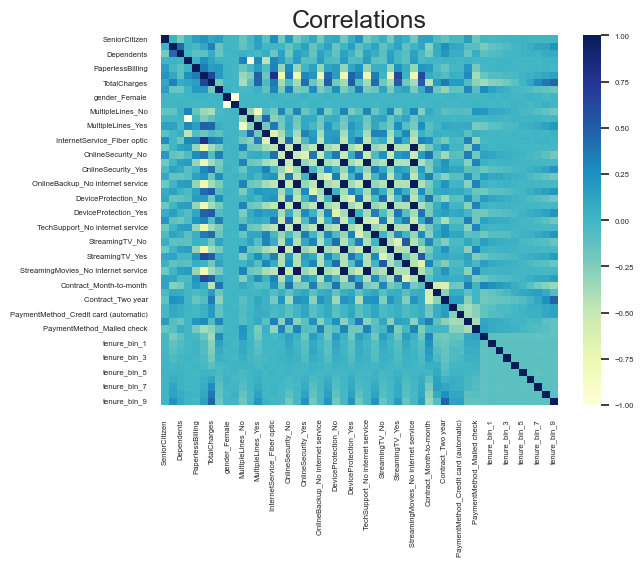

In [22]:
corr_matrix = data.corr()
sns.set(font_scale=0.5)
sns.heatmap(corr_matrix,cmap="YlGnBu")
plt.title("Correlations", fontsize=18)

Churn is the value we are trying to predict so we need to look at correlations between this column and others.

In [23]:
corr_matrix["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404884
OnlineSecurity_No                          0.342255
TechSupport_No                             0.336861
InternetService_Fiber optic                0.308170
PaymentMethod_Electronic check             0.301544
tenure_bin_0                               0.267487
OnlineBackup_No                            0.267049
DeviceProtection_No                        0.251465
MonthlyCharges                             0.194508
PaperlessBilling                           0.190891
SeniorCitizen                              0.151619
tenure_bin_1                               0.133573
StreamingMovies_No                         0.129117
StreamingTV_No                             0.127197
tenure_bin_2                               0.071486
StreamingTV_Yes                            0.065032
StreamingMovies_Yes                        0.063192
MultipleLines_Yes                          0.041958
tenure_bin_3

In [24]:
abs(corr_matrix["Churn"]).sort_values(ascending=False)[abs(corr_matrix["Churn"]) > 0.3]

Churn                             1.000000
Contract_Month-to-month           0.404884
OnlineSecurity_No                 0.342255
TechSupport_No                    0.336861
InternetService_Fiber optic       0.308170
Contract_Two year                 0.302076
PaymentMethod_Electronic check    0.301544
Name: Churn, dtype: float64

Seems like there are no strong correlations (>0.7) but we cannot train a model without having any attributes. Therefore we take those columns that have more than 0.3 absolute correlation value and we take tenure aswell (it has been divided into bins and actually is important too).

### Dividing and balancing data

In [25]:
chosen_columns = ["Contract_Month-to-month", "OnlineSecurity_No", "TechSupport_No", "InternetService_Fiber optic", "Contract_Two year", "PaymentMethod_Electronic check"]
# Adding all of the tenure bins
for column in tenure_onehot_values:
    chosen_columns.append(column)
data =  shuffle(data)

X = data[chosen_columns]
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Train size", len(X_train))
print("Test size", len(X_test))

Train size 5616
Test size 1405


In [27]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [28]:
# Changes
print("Before balance",sorted(Counter(y_train).items()))
print("After balance",sorted(Counter(y_resampled).items()))

Before balance [(0, 4136), (1, 1480)]
After balance [(0, 4136), (1, 4136)]


### Building models

Since this is a binary classification task we need to use models that can do the task. 

The first model is RandomForestClassifier. The output of the model is the class that was selected by majority of the trees. This is one of the simplest models for classification. 

In [29]:
model1 = RandomForestClassifier(n_estimators=40, min_samples_leaf=5, max_leaf_nodes=50, random_state=42)
model1.fit(X_resampled, y_resampled)

RandomForestClassifier(max_leaf_nodes=50, min_samples_leaf=5, n_estimators=40,
                       random_state=42)

The second model is GaussianNB. Again this is another classification model and it uses Gaussian distribution.

In [30]:
model2 = GaussianNB()
model2.fit(X_resampled, y_resampled)

GaussianNB()

The third and fourth models are a neural network with three layers. Last layer has sigmoid activation because we want to have a value between 0 and 1.

In [31]:
model3 = Sequential()

model3.add(Dense(16, activation="tanh", input_shape=(X_resampled.shape[1],)))
model3.add(BatchNormalization())
model3.add(Dense(8, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

model3.summary()

model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

model3.fit(X_resampled, y_resampled, epochs=100, batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 481
Trainable params: 449
Non-trainable params: 32
_________________________________________________________________
Epoch 1/100
259/259 [==============================] - 1s 999us/step - loss: 0.5824 - accuracy: 0.7112
Epoch 2/100
259/259 

In [32]:
model4 = Sequential()

model4.add(Dense(64, activation="relu", input_shape=(X_resampled.shape[1],)))
model4.add(Dense(16, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

model4.summary()

model4.compile(loss='binary_crossentropy', optimizer="sgd", metrics=["accuracy"])

model4.fit(X_resampled, y_resampled, epochs=100, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1088      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.6375 - accuracy: 0.6912
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.7454
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.7552
Epoch 4/100
2

The fifth model is a GradientBoostingClassifier.

In [33]:
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model5.fit(X_resampled, y_resampled)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

### Evaluating models

In [34]:
models = []
accuracies = []

In [35]:
y_pred_model1 = model1.predict(X_test)
models.append("RFC")
accuracies.append(accuracy_score(y_test, y_pred_model1))

In [36]:
y_pred_model2 = model2.predict(X_test)
models.append("NB")
accuracies.append(accuracy_score(y_test, y_pred_model2))

In [37]:
y_pred_model3 = model3.predict(X_test)
y_pred_model3 = np.round(y_pred_model3).flatten()
models.append("Seq1")
accuracies.append(accuracy_score(y_test, y_pred_model3))

44/44 [==============================] - 0s 820us/step


In [38]:
y_pred_model4 = model4.predict(X_test)
y_pred_model4 = np.round(y_pred_model4).flatten()
models.append("Seq2")
accuracies.append(accuracy_score(y_test, y_pred_model4))

44/44 [==============================] - 0s 767us/step


In [39]:
y_pred_model5 = model5.predict(X_test)
models.append("GBC")
accuracies.append(accuracy_score(y_test, y_pred_model5))

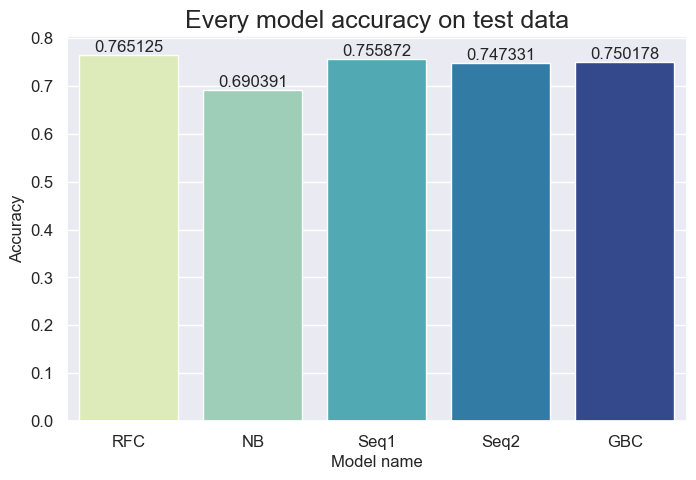

In [40]:
fig = plt.figure(figsize=(8,5))

ax = sns.barplot(x=models, y=accuracies, palette='YlGnBu')
ax.bar_label(ax.containers[0], fontsize=12)

plt.xlabel("Model name", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Every model accuracy on test data", fontsize=18)
plt.show()

### Summary

The built models can predict the churn with roughly 75% accuracy which is better than a random guess. 